# DETR with ResNet-50 Backbone

Image Classification using DETR with ResNet-50 as backbone

In [1]:
# Required Imports
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

In [4]:
# Get the resources
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

In [7]:
# Usage of model from HugginFace
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

Detected remote with confidence 0.998 at location [40.16, 70.81, 175.55, 117.98]
Detected remote with confidence 0.996 at location [333.24, 72.55, 368.33, 187.66]
Detected couch with confidence 0.995 at location [-0.02, 1.15, 639.73, 473.76]
Detected cat with confidence 0.999 at location [13.24, 52.05, 314.02, 470.93]
Detected cat with confidence 0.999 at location [345.4, 23.85, 640.37, 368.72]


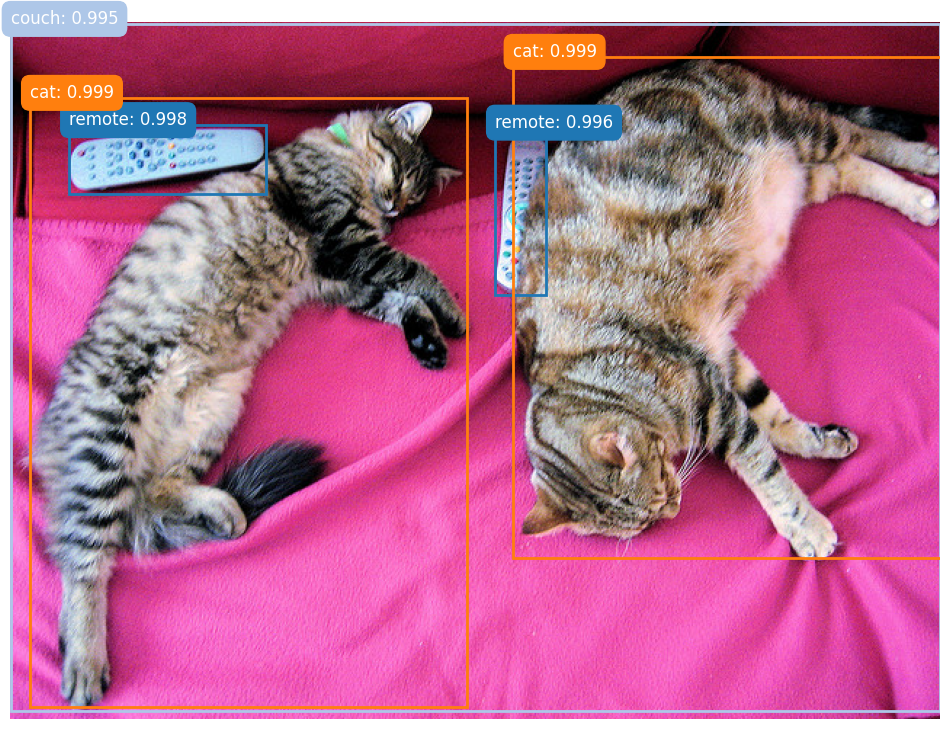

In [9]:
import numpy as np
from matplotlib import pyplot as plt, patches

# Let's show what we detected directly in the image


# Define a list of colors for the bounding boxes
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # This generates 20 distinct colors

# Create a dictionary to map labels to a specific color
label_color_map = {}

# Display the image
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]  # [xmin, ymin, xmax, ymax]
    label_text = model.config.id2label[label.item()]
    score = round(score.item(), 3)

    # Assign a color to each unique label
    if label_text not in label_color_map:
        # Use the current size of the dictionary to choose a color
        label_color_map[label_text] = colors[len(label_color_map) % len(colors)]

    color = label_color_map[label_text]

    # Create a Rectangle patch with the assigned color
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor=color, facecolor='none')

    # Add the rectangle to the plot
    ax.add_patch(rect)

    # Add label and score with a background color
    plt.text(box[0], box[1], f'{label_text}: {score}', color='white', fontsize=12, bbox=dict(facecolor=color, edgecolor=color, boxstyle='round,pad=0.5'))

# Remove axis information for clarity
ax.axis('off')

# Display the final image
plt.show()

## Part 2 - Function to automatically detect and plot given a photo path

...

In [10]:
# Function to generate a unique color for each label
def get_unique_colors(num_colors):
    colors = plt.cm.get_cmap('hsv', num_colors)
    return colors

def process_and_plot_image(image_path):
    # Load the image
    image = Image.open(image_path)

    # Process the image
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)

    # Convert outputs (bounding boxes and class logits) to format for plotting
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

    # Prepare unique colors for each detected label
    unique_labels = list(set(results['labels'].tolist()))
    color_map = get_unique_colors(len(unique_labels))
    label_to_color = {label: color_map(unique_labels.index(label)) for label in unique_labels}

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(image)

    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i, 2) for i in box.tolist()]
        label_name = model.config.id2label[label.item()]
        score = round(score.item(), 3)
        color = label_to_color[label.item()]

        # Create a Rectangle patch with a unique color
        rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor=color, facecolor='none')

        # Add the rectangle to the plot
        ax.add_patch(rect)

        # Add label and score with a matching color background
        plt.text(box[0], box[1], f'{label_name}: {score}', color='white', backgroundcolor=color, fontsize=12)

    ax.axis('off')
    plt.show()

C:\Users\tommc\AppData\Local\Temp\ipykernel_3796\3320325771.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', num_colors)


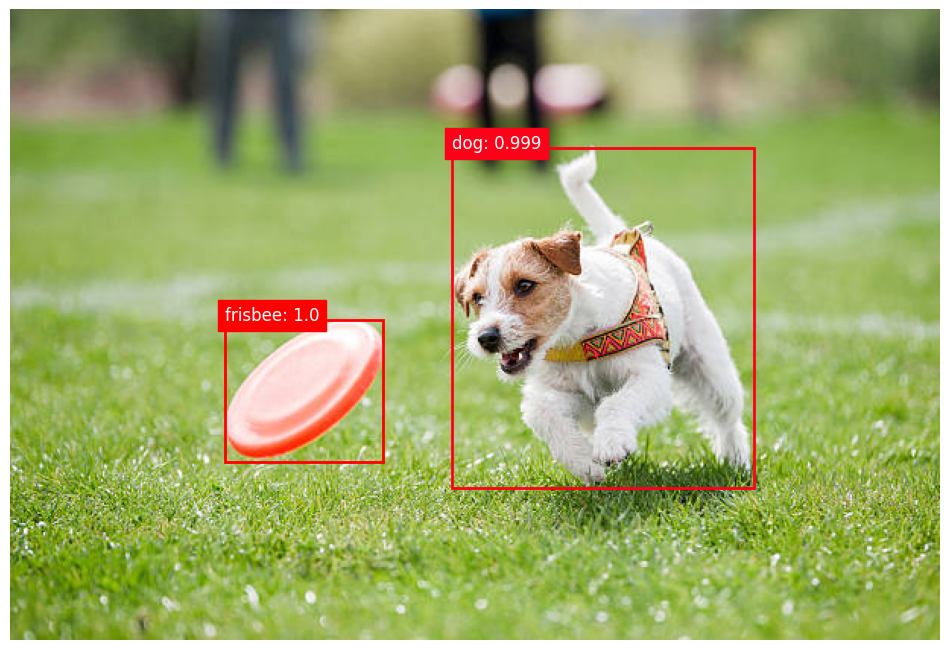

In [12]:
# Example usage
process_and_plot_image('res/dog-frisbee.jpg')

C:\Users\tommc\AppData\Local\Temp\ipykernel_3796\3320325771.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', num_colors)


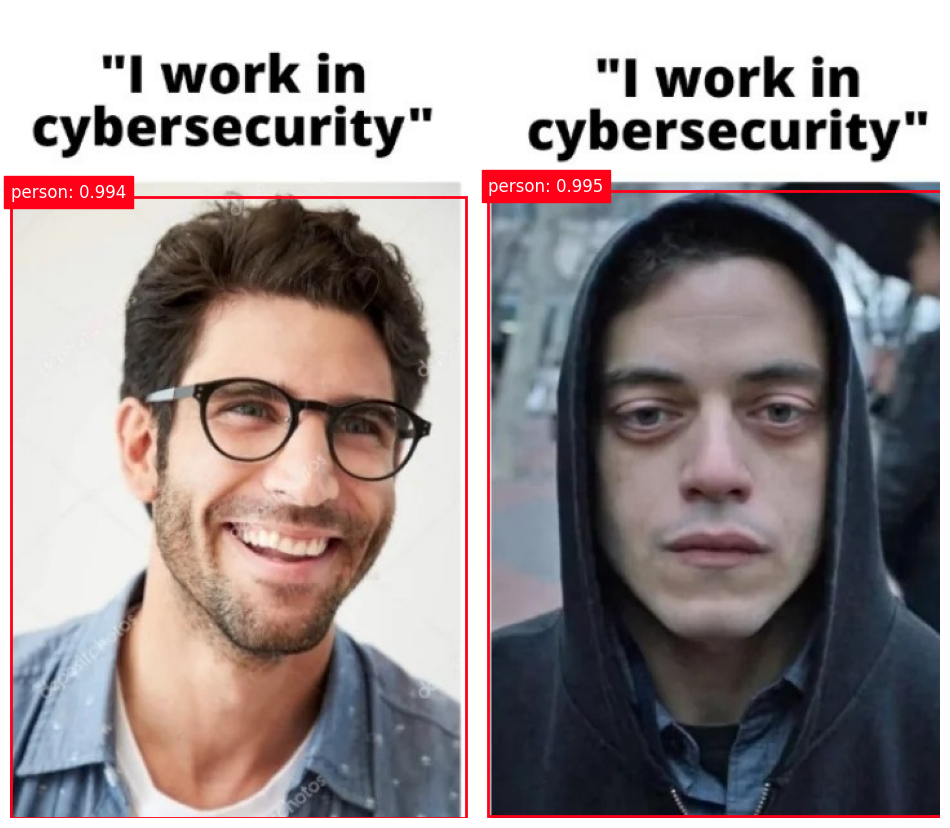

In [13]:
process_and_plot_image('res/meme.jpg')